In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    ConfusionMatrixDisplay,
)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [4]:
# load data
df = pd.read_csv("rcc_simulation.csv", sep=';')
df.columns = [
    "activate_therapy", "patient_sex", "bmi", "cd8", "treg", "nk", "m1", "m2", "tumorCells",
    "immune_response_level", "tumor_proliferation_rate", "resistance_to_therapy", "result"
]

#conversion from boolean to integer
df["activate_therapy"] = df["activate_therapy"].astype(int)
df["patient_sex"] = df["patient_sex"].astype(bool).astype(int)
df["result"] = df["result"].astype(bool).astype(int)

# splitting features and target
X = df.drop("result", axis=1)
y = df["result"]

🎯 Random Forest Classifier Results
Accuracy: 0.8864

Classification Report:
              precision    recall  f1-score   support

Not Survived       0.88      0.64      0.74        22
    Survived       0.89      0.97      0.93        66

    accuracy                           0.89        88
   macro avg       0.88      0.80      0.83        88
weighted avg       0.89      0.89      0.88        88

Confusion Matrix:
[[14  8]
 [ 2 64]]


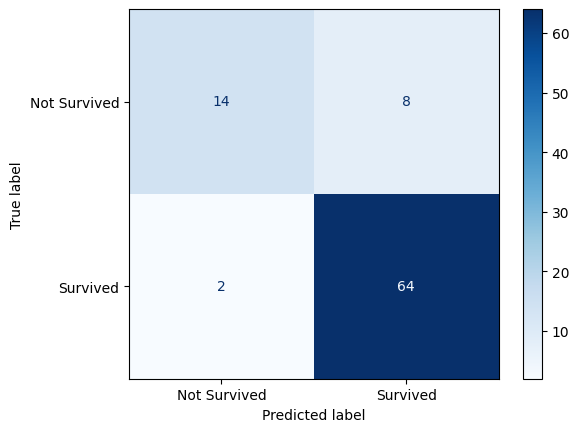


📊 Feature Importances (ordered):
1. tumor_proliferation_rate: 0.3129
2. immune_response_level: 0.1575
3. cd8: 0.0789
4. resistance_to_therapy: 0.0705
5. nk: 0.0676
6. bmi: 0.0662
7. m2: 0.0649
8. m1: 0.0571
9. treg: 0.0559
10. tumorCells: 0.0476
11. activate_therapy: 0.0114
12. patient_sex: 0.0096


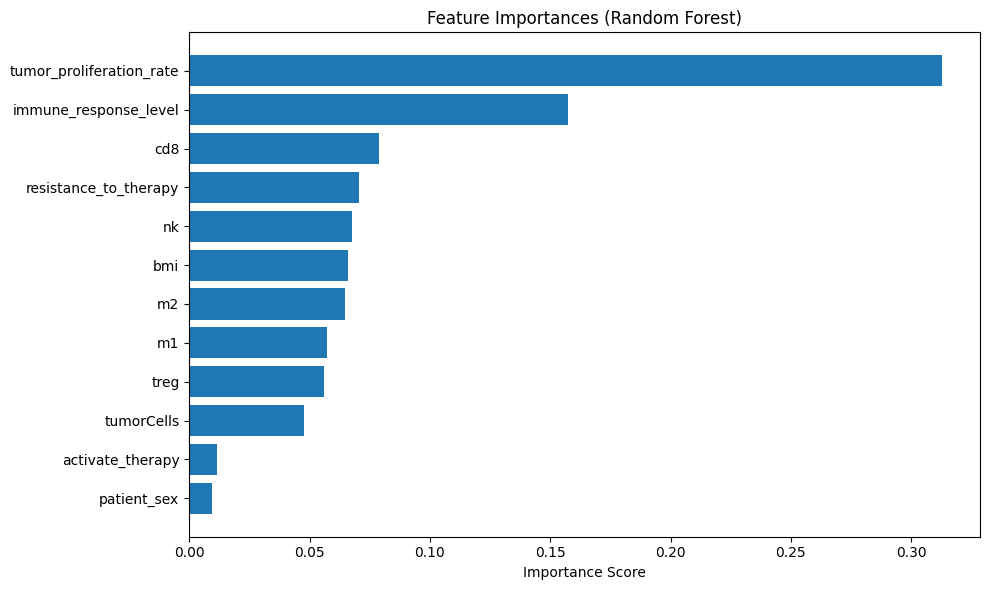

In [ ]:
#RANDOM FOREST
# === 1. Standardizing data ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 2. Dividing dataset in train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# === 3. Random Forest ===
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# === 4. Evaluation ===
print(" Random Forest Classifier Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Survived", "Survived"]))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Survived", "Survived"])
disp.plot(cmap="Blues")
plt.show()

# === 5. Feature importance ===
importances = rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

print("\n Feature Importances (ordered):")
for i in range(len(feature_names)):
    print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

# === 6. Most valuable features ===
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.barh(range(len(feature_names)), importances[indices], align="center")
plt.yticks(range(len(feature_names)), [feature_names[i] for i in indices])
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


🔍 KMeans Clustering (non supervisionato)
              precision    recall  f1-score   support

           0       0.20      0.14      0.17       106
           1       0.68      0.18      0.28       294
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.17       400
   macro avg       0.15      0.05      0.08       400
weighted avg       0.55      0.17      0.25       400

Confusion Matrix:
[[15 25 10 32 19  5]
 [60 53 69 20 37 55]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]]


c:\Users\diego\Desktop\uni\magistrale\MASL\MASL2425_EXAM\masl_venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\diego\Desktop\uni\magistrale\MASL\MASL2425_EXAM\masl_venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\diego\Desktop\uni\magistrale\MASL\MASL2425_EXAM\masl_venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _

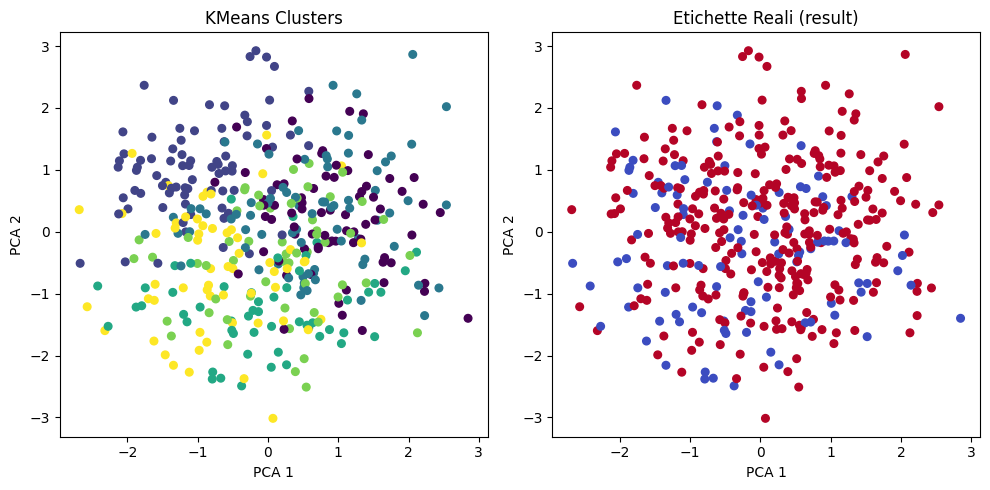

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

print("\n🔍 KMeans Clustering (not supervised)")
print(classification_report(y, cluster_labels))
print("Confusion Matrix:")
print(confusion_matrix(y, cluster_labels))

# === 7. Clustering Visualization con PCA ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 5))

# Plot KMeans Clusters
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=30)
plt.title("KMeans Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# Plot real label
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', s=30)
plt.title("Etichette Reali (result)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.tight_layout()
plt.show()